##I. Perkenalan
Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Practical Statistics

Nama: Hafidz Muta'ali

Batch: 006

## II. Import Pustaka yang digunakan

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import t

In [100]:
from google.colab import files
files.upload()  

{}

##III. Data Loading
Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan explorasi data secara sederhana.


In [101]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


##IV. Data Cleaning
Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values, menghapus kolom yang tidak dipakai, dan lain sebagainya.

In [102]:
#Mencari apakah ada data yang null
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [103]:
#Memberikan Value ke data yang kosong
df['name'].fillna('-', inplace =True)
df['usd pledged'].fillna(0, inplace =True)

In [104]:
#Melakukan rename terhadap coloumn usd pledged
df = df.rename(
        columns = {
            'usd pledged' : 'usd_pledged'
        })

In [105]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

## V. Eksplorasi Data
Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [106]:
df.shape

(378661, 15)

In [107]:
df1=df.copy()#melakukan copy data agar data utama bisa digunakan kembali
df1.describe()

,ID,goal,pledged,backers,usd_pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,6.966168e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.824761e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.345000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.750000e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.000000e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


Text(0.5, 0, 'Number of campaigns')

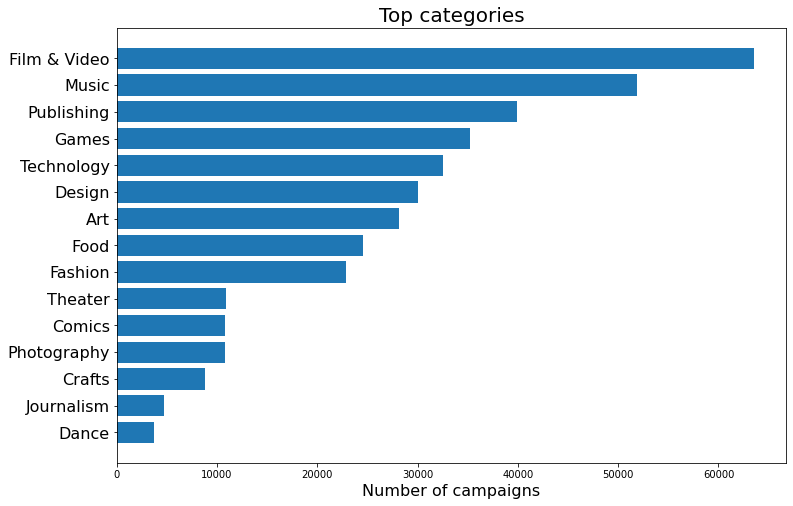

In [108]:
#Melihat category tertinggi
top_cat = df1.main_category.value_counts()
x = top_cat.index.tolist()
y = top_cat

plt.figure(figsize=(12, 8))
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis() #make rank 1 show at the top
plt.barh(np.arange(len(x)),y)
plt.title('Top categories', fontsize = 20)
plt.xlabel('Number of campaigns', fontsize = 16)

Text(0.5, 0, 'Number of campaigns')

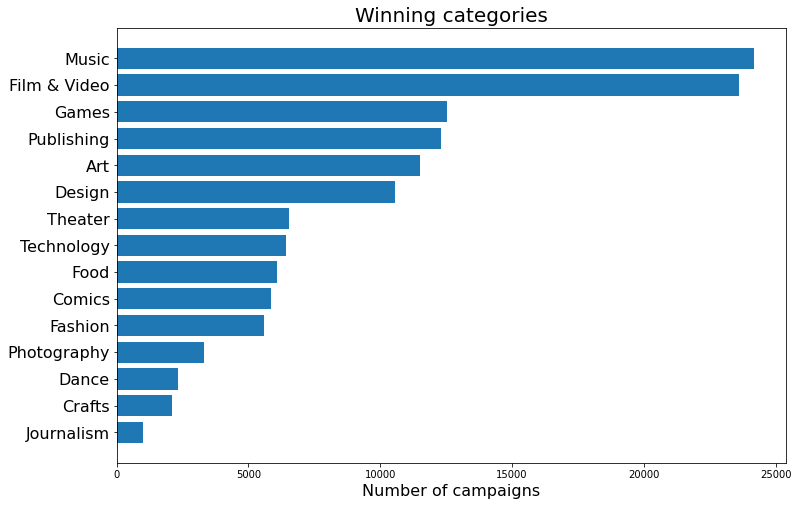

In [109]:
#Melihat kategori paling sukses
success = df1.loc[df1.state=='successful','main_category'].value_counts()
x = success.index.tolist()
y = success

plt.figure(figsize=(12, 8))
plt.yticks(np.arange(len(x)),x, fontsize = 16)
plt.gca().invert_yaxis()
plt.barh(np.arange(len(x)),y)
plt.title('Winning categories', fontsize = 20)
plt.xlabel('Number of campaigns', fontsize = 16)

##VI. Measure of Central Tendency
* Mencari Mean
* Mencari Modus
* Mencari Median

In [110]:
#Mencari Mean dari kolom tertentu
kolom = ['goal','pledged','backers','usd_pledged','usd_pledged_real','usd_goal_real']
for col in kolom:
    print ('Mean ' + df1[col].name + ' = ' + str(df1[col].mean()))

Mean goal = 49080.79152056854
Mean pledged = 9682.97933946224
Mean backers = 105.61747578969052
Mean usd_pledged = 6966.168499106134
Mean usd_pledged_real = 9058.924074119337
Mean usd_goal_real = 45454.40146545336


In [111]:
#Mencari Modus dari kolom tertentu
for col in kolom:
    print ('Modus ' + df1[col].name + ' = ' + str(df1[col].mode()[0]))

Modus goal = 5000.0
Modus pledged = 0.0
Modus backers = 0
Modus usd_pledged = 0.0
Modus usd_pledged_real = 0.0
Modus usd_goal_real = 5000.0


In [112]:
#Mencari Median dari kolom tertentu
for col in kolom:
    print ('Median ' + df1[col].name + ' = ' + str(df1[col].median()))

Median goal = 5200.0
Median pledged = 620.0
Median backers = 12.0
Median usd_pledged = 375.0
Median usd_pledged_real = 624.33
Median usd_goal_real = 5500.0


##VII. Measure of Variance
* Mencari Range
* Mencari Variance
* Mencari Standard Deviation

In [113]:
#Mencari Range
for col in kolom:
    print ('Range ' + df1[col].name + ' : ' + str(df1[col].max() - df1[col].min()))

Range goal : 99999999.99
Range pledged : 20338986.27
Range backers : 219382
Range usd_pledged : 20338986.27
Range usd_pledged_real : 20338986.27
Range usd_goal_real : 166361390.70000002


In [114]:
#mencari variance
for col in kolom:
    print ('Variance ',col , ':',  df1[col].var())

Variance  goal : 1400414872097.0361
Variance  pledged : 9146246409.673967
Variance  backers : 822984.6873539966
Variance  usd_pledged : 6122689132.431702
Variance  usd_pledged_real : 8276149156.121636
Variance  usd_goal_real : 1329293829528.3057


In [115]:
#mencari std 
for col in kolom:
    print ('Standard Derivation ' + df1[col].name + ' = ' + str(df1[col].std()))

Standard Derivation goal = 1183391.2590927128
Standard Derivation pledged = 95636.01000498697
Standard Derivation backers = 907.1850347938928
Standard Derivation usd_pledged = 78247.6142283693
Standard Derivation usd_pledged_real = 90973.34310731708
Standard Derivation usd_goal_real = 1152950.0550883831


## VIII. Confidence Intervals

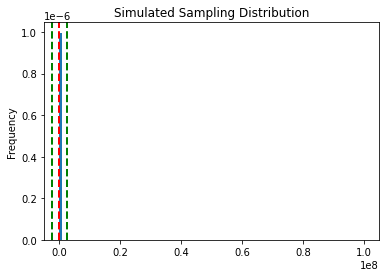

Sampling Mean: 49080.79152056854
Sampling StdErr: 1183391.2590927128
95% Confidence Interval: (-2270323.455920656, 2368485.0389617933)


In [117]:
#goal
ci = stats.norm.interval(0.95, df1['goal'].mean(), df1['goal'].std())

# Plot the distribution, mean, and CI
df1['goal'].plot.hist(title='Simulated Sampling Distribution', bins=100, density=True) 
plt.axvline(df1['goal'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(df1['goal'].mean()))
print ('Sampling StdErr: ' + str(df1['goal'].std()))
print ('95% Confidence Interval: ' + str(ci))

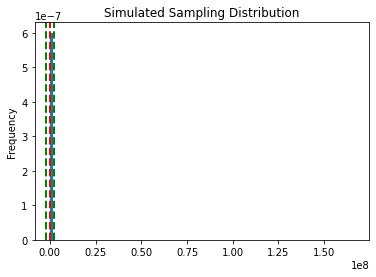

Sampling Mean: 45454.40146545336
Sampling StdErr: 1152950.0550883831
95% Confidence Interval: (-2214286.182481249, 2305194.9854121553)


In [118]:
#usd_goal_real
ci = stats.norm.interval(0.95, df1['usd_goal_real'].mean(), df1['usd_goal_real'].std())

# Plot the distribution, mean, and CI
df1['usd_goal_real'].plot.hist(title='Simulated Sampling Distribution', bins=100, density=True) 
plt.axvline(df1['usd_goal_real'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2)
plt.show()

# Print the Mean, StdDev and 95% CI
print ('Sampling Mean: ' + str(df1['usd_goal_real'].mean()))
print ('Sampling StdErr: ' + str(df1['usd_goal_real'].std()))
print ('95% Confidence Interval: ' + str(ci))

#IX. Hypothesis Testing

In [119]:
#Normality Test
stat, p = stats.shapiro(np.log(df1['usd_goal_real']+1).sample(500, random_state=42))

print("Shapiro stat:", stat)
print("P-value: ", p)
if p >= 0.05:
    print('Normal Distribution')
else:
    print("Non-Normal Distribution")

Shapiro stat: 0.9682551622390747
P-value:  6.244761152629508e-09
Non-Normal Distribution


## T TEST
Our hypothesis on this case:

H0: μ_film&video = μ_music

H1: μ_film&video != μ_music

In [120]:
df_film = df1[df1['category']=='Film & Video'][['goal','usd_goal_real']].sum()
df_music = df1[df1['category']=='Music'][['goal','usd_goal_real']].sum()

print('Average sales Film & Video: ${}'.format(np.round(df_film.usd_goal_real.mean())))
print('Average sales Music: ${}'.format(np.round(df_music.usd_goal_real.mean())))

Average sales Film & Video: $820154988.0
Average sales Music: $326035243.0


In [121]:
t_stat, p_val = stats.ttest_ind(df_film,df_music)
print('P-value:',p_val) #the p-value isn't divided by 2 since the output is two-sided p-value
print('t-statistics:',t_stat)

P-value: 0.000132077581707653
t-statistics: 87.00464152478341


##Kesimpulan
* Jika dilihat berdasarkan top categories Film & Video memuncaki peringkat 1
* Jika dilihat berdasarkan sukses acara kategori Music memuncaki peringkat 1
* Berdasarkan Normality test dapat dipastikan bahwa distribusi data tidak normal
* Berdasarkan T - Test dapat dilihat bahwa H0 ditolak karena P-value yang didapatkan sangat kecil dibawah < 0.05